<a href="https://colab.research.google.com/github/savindu29/Save-hearts/blob/feat%2Fsavindu/lstm_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [4]:
data = pd.read_csv('/content/drive/MyDrive/data/data.csv')

In [5]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Sort the data by date
data = data.sort_values('Date')

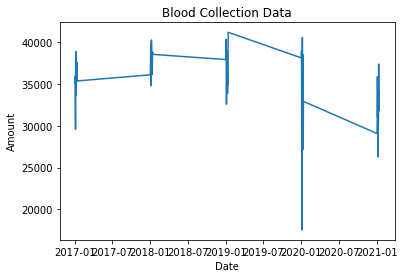

In [6]:
# Set the 'Date' column as the index
data = data.set_index('Date')

# Visualize the data
plt.plot(data)
plt.title('Blood Collection Data')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

In [7]:
# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [8]:

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [9]:

# Create a function to generate the input and output sequences for the LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [10]:
# Set the sequence length
seq_length = 6

# Generate the input and output sequences for the train and test sets
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2)

# Make predictions for the test set
y_pred = model.predict(X_test)

Epoch 1/50
3/3 - 3s - loss: 0.4834 - 3s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.4264 - 20ms/epoch - 7ms/step
Epoch 3/50
3/3 - 0s - loss: 0.3706 - 19ms/epoch - 6ms/step
Epoch 4/50
3/3 - 0s - loss: 0.3137 - 17ms/epoch - 6ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2622 - 22ms/epoch - 7ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2090 - 20ms/epoch - 7ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1610 - 19ms/epoch - 6ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1190 - 21ms/epoch - 7ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0796 - 31ms/epoch - 10ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0491 - 22ms/epoch - 7ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0341 - 19ms/epoch - 6ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0344 - 22ms/epoch - 7ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0414 - 19ms/epoch - 6ms/step
Epoch 14/50
3/3 - 0s - loss: 0.0441 - 18ms/epoch - 6ms/step
Epoch 15/50
3/3 - 0s - loss: 0.0395 - 20ms/epoch - 7ms/step
Epoch 16/50
3/3 - 0s - loss: 0.0340 - 22ms/epoch - 7ms/step
Epoch 17/50
3/3 - 0s - loss: 0.0313 - 22ms/epoch - 

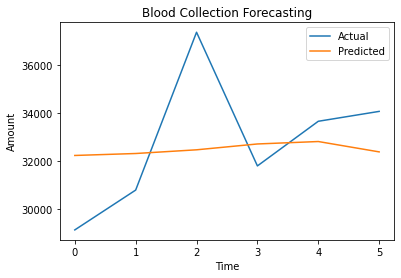

In [13]:
# Rescale the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Visualize the predictions and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Blood Collection Forecasting')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [14]:
# Forecast the next month
last_six_months = data.iloc[-6:].values
last_six_months_scaled = scaler.transform(last_six_months)
X_next_month = np.array([last_six_months_scaled])
y_next_month_scaled = model.predict(X_next_month)
y_next_month = scaler.inverse_transform(y_next_month_scaled)
print('The forecast for the next month is:', y_next_month[0][0])

1/1 [==============================] - 0s 43ms/step
The forecast for the next month is: 33340.59


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
